#### Introduction
This machine learning project aims to predict the presence of trauma in the records of 250,0000 individuals.  The dataset includes various health metrics and lifestyle indicators such as age, BMI, smoking habits, alcohol consumption, and the prevalence of certain health conditions. With trauma present in approximately 48.9% of the rows, the dataset is considered balanced in regard to project objectives.  We will initially compare two machine learning models—Random Forest and XGBoost—to determine which model performs better for this classification challenge. Based on the initial results, the best-performing model will be further optimized to achieve higher accuracy and reliability in predicting trauma. The dataset has been thoroughly cleaned, with no missing values or outliers, ensuring reliable model training and evaluation.

#### Project Outline
1. **Data Preparation**
   - Import the necessary libraries.
   - Load and preprocess the dataset.
   - Split the data into training and testing sets.

2. **Exploratory Data Analysis (EDA)**
   - Visualize feature distributions and relationships to understand the data better.
   - Analyze correlations between features and the target variable (Trauma).

3. **Model Training - Random Forest**
   - Train a Random Forest model on the training dataset.
   - Evaluate the model using metrics such as accuracy, precision, recall, and F1 score.

4. **Model Training - XGBoost**
   - Train an XGBoost model on the training dataset.
   - Evaluate the model using similar metrics as Random Forest.

5. **Comparison of Model Performance**
   - Compare the initial performance of Random Forest and XGBoost models using key metrics.
   - Identify the better-performing model based on evaluation metrics.

6. **Hyperparameter Tuning**
   - Optimize the best-performing model to improve accuracy and performance.
   - Perform cross-validation to ensure the stability of the tuned model.

7. **Final Evaluation**
   - Re-evaluate the tuned model on the test dataset.
   - Analyze feature importance to understand the factors contributing most to trauma prediction.

8. **Conclusion**
   - Summarize the findings from the project.
   - Provide insights into the model's predictive capabilities and potential areas of improvement.


#### Project Outline
1. **Data Preparation**
   - Import the necessary libraries.
     - `pandas` for data manipulation and handling of tabular data.
     - `numpy` for numerical operations.
     - `sklearn.model_selection` for splitting the data into training and testing sets.
     - `sklearn.ensemble` for implementing the Random Forest classifier.
     - `xgboost` for training the XGBoost model.
     - `sklearn.metrics` for evaluating model performance using metrics such as accuracy, precision, and recall.
   - Load and preprocess the dataset.
   - Split the data into training and testing sets.

#### Output Summary
The dataset has trauma cases present in approximately 48.9% of the rows, indicating a balanced dataset suitable for classification tasks. This balance provides an ideal basis for training and evaluating models without requiring extensive adjustments for class imbalance.


In [29]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the dataset
file_path = '/Users/steventuschman/Desktop/trauma_dataset.csv'
trauma_df = pd.read_csv(file_path)

# Step 3: Display basic statistics for the dataset
print(trauma_df.describe())

# Step 4: Split the data into training and testing sets
X = trauma_df.drop('Trauma', axis=1)
y = trauma_df['Trauma']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                 Age            BMI        Obesity        Smoking  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       48.008272      29.683291       0.378916       0.124044   
std        18.812492       7.189958       0.485118       0.329632   
min        18.000000      16.000000       0.000000       0.000000   
25%        32.000000      24.500000       0.000000       0.000000   
50%        47.000000      28.200000       0.000000       0.000000   
75%        63.000000      35.100000       1.000000       0.000000   
max        89.000000      45.000000       1.000000       1.000000   

        High Alcohol  Heart Disease         Cancer           COPD  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean        0.443568       0.158216       0.081640       0.089908   
std         0.496806       0.364944       0.273816       0.286050   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

#### Correlation Matrix/ Trauma Correlations


- **Trauma Correlations**:
  - The correlations between `Trauma` and other features are relatively low, with most values ranging between -0.1 and 0.2.
  - The highest correlations observed are with features like **Stroke** (0.21), **Heart Disease** (0.13), and **Exam Score** (-0.23). These correlations indicate weak relationships.

- **Interpretation**:
  - The relatively low correlations with `Trauma` align with the somewhat random nature of trauma. Trauma can often be influenced by a wide array of factors, including sudden accidents or unpredictable health conditions, which makes it difficult to find strong relationships with most available features.
  - **Machine Learning Challenges**:
    - Given the low correlations with `Trauma`, it is likely that achieving strong predictive performance (e.g., high F1 Score) will be challenging. The low correlations suggest that the features in the dataset may not provide enough discriminatory power for the model to effectively distinguish between traumatic and non-traumatic cases.
    - It is expected that the model may struggle to generalize well, potentially requiring careful feature engineering, hyperparameter tuning, and even external data to enhance performance.

In conclusion, while there are some weak correlations between certain features and trauma, the randomness of trauma as an outcome may pose significant challenges to achieving strong model performance. Careful consideration will need to be given to feature selection, engineering, and model tuning in subsequent stages.




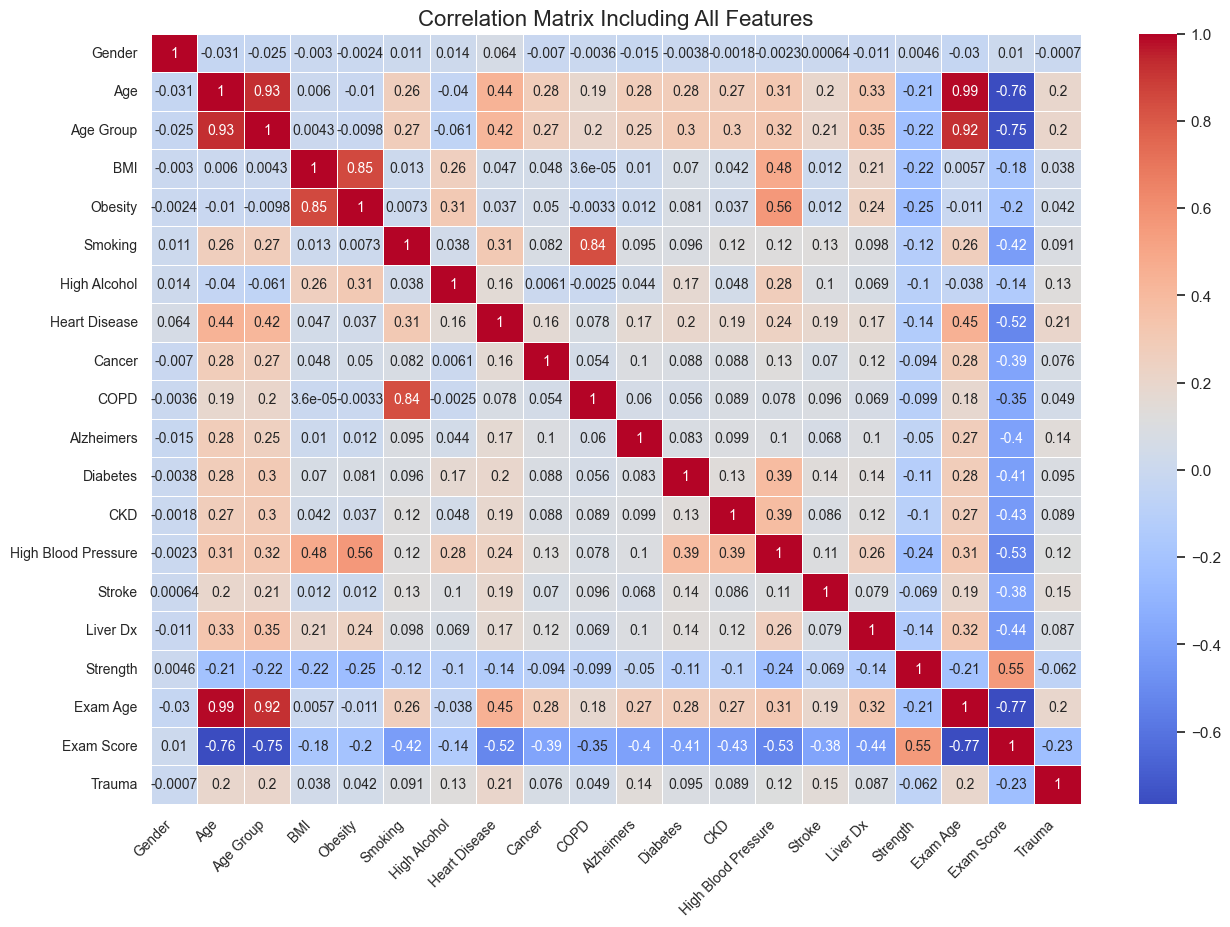

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to preserve the original
encoded_df = trauma_df.copy()

# Identify all object (non-numeric) columns
categorical_columns = encoded_df.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

    # Calculate correlations for the encoded DataFrame
corr_matrix = encoded_df.corr()

# Plot the heatmap of the correlation matrix with improved settings
plt.figure(figsize=(15, 10))  # Increase the figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})  # Adjust annotation font size
plt.title('Correlation Matrix Including All Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust y-axis label size
plt.show()


    





In [31]:
# Convert object columns to categorical
categorical_columns = ['Gender', 'Age Group', 'Exam Age']
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


#### **Output Summary**

The XGBoost model was trained on the dataset, and predictions were made on the test set. The model's performance metrics are as follows:

**Accuracy: 0.62**

Definition: Accuracy measures the percentage of correct predictions made by the model out of all predictions. In this case, 62% of the total predictions made by the XGBoost model were correct.

Interpretation: An accuracy of 0.62 indicates that the model correctly identified trauma and non-trauma cases 62% of the time. 



**Precision: 0.65**

Definition: Precision measures the proportion of positive identifications (predicted trauma cases) that were actually correct. It indicates how reliable the model's positive predictions are.

Interpretation: A precision of 0.65 means that 65% of the instances the model predicted as trauma were correct. This indicates that while the model is moderately reliable in identifying true trauma cases, there is still a significant number of false positives.


**Recall: 0.47**

Definition: Recall measures the ability of the model to identify all relevant instances (true positives). It shows how well the model is capturing actual trauma cases.

Interpretation: A recall of 0.47 indicates that the model correctly identified 47% of all actual trauma cases. This relatively low recall suggests that the model is missing more than half of the true trauma cases, which is a significant limitation. This is poor considering that trauma occurs in 48.9% of rows, indicating that the model is not performing better than random guessing.


**F1 Score: 0.55**

Definition: The F1 Score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.

Interpretation: An F1 Score of 0.55 represents a trade-off between precision and recall (which is lesser than chance/random), indicating that the model has a moderate balance between correctly identifying trauma cases (poorly) and avoiding false positives. Mathematically, the F1 Score of 0.55 shows that the model's performance is neither highly precise nor highly comprehensive (not better than random) in identifying trauma cases. This score highlights the challenge in balancing both aspects effectively when the underlying correlations are weak.
Overall Interpretation:

The metrics for the XGBoost model indicate a moderate level of performance, which aligns with the expectations discussed earlier. Given the weak correlations between the features and the Trauma variable, it is not surprising that the F1 Score and other metrics are relatively low.

The F1 Score of 0.55 suggests that while the model has a reasonable balance between Precision and Recall, it still struggles to accurately predict trauma cases. This is evidenced by the relatively low Recall score of 0.47, which indicates that the model has difficulty in identifying all true positive cases of trauma. In other words, the model is missing a substantial number of actual trauma cases.

Improvement Considerations: Overall, the results can be considered poor.  The randomness and weak feature correlations in the dataset make it challenging for the model to achieve high predictive accuracy. To improve performance, several strategies could be explored:

Feature Engineering: Creating new features or transforming existing ones may help provide better signals for the model to learn from.

Hyperparameter Tuning: Adjusting the parameters of the XGBoost model could potentially lead to better performance.

Additional Data: Incorporating more detailed health metrics, socio-economic information, or other contextual data might improve the model's ability to predict trauma more effectively.

Alternative Models: Trying other models or ensemble techniques may yield better results given the complexity and randomness of predicting trauma.

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the XGBoost model with categorical support enabled
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', enable_categorical=True)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Model - Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Model - Precision: {precision_xgb:.2f}")
print(f"XGBoost Model - Recall: {recall_xgb:.2f}")
print(f"XGBoost Model - F1 Score: {f1_xgb:.2f}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [06:49:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model - Accuracy: 0.62
XGBoost Model - Precision: 0.65
XGBoost Model - Recall: 0.47
XGBoost Model - F1 Score: 0.55


#### **Output Summary**

The Random Forest model was trained on the dataset, and predictions were made on the test set. The model's performance metrics are as follows:

**Accuracy: 0.56**

- **Definition**: Accuracy measures the percentage of correct predictions made by the model out of all predictions. In this case, 62% of the total predictions made by the Random Forest model were correct.
- **Interpretation**: An accuracy of 0.56 indicates that the model correctly identified trauma and non-trauma cases 56% of the time. This is  a degradation in performance compared to the the XGBoost model, which achieved an accuracy of 0.62.

**Precision: 0.56**

- **Definition**: Precision measures the proportion of positive identifications (predicted trauma cases) that were actually correct. It indicates how reliable the model's positive predictions are.
- **Interpretation**: A precision of 0.56 means that 56% of the instances the model predicted as trauma were correct. Compared to XGBoost's precision of 0.65, Random Forest showed significantly poorer results. 

**Recall: 0.54**

- **Definition**: Recall measures the ability of the model to identify all relevant instances (true positives). It shows how well the model is capturing actual trauma cases.
- **Interpretation**: A recall of 0.54 indicates that the model correctly identified 54% of all actual trauma cases. This is better than the XGBoost model's recall of 0.47, although still lower than desired, as it suggests the model is missing close half of the true trauma cases and performing worse than random guesses. 

**F1 Score: 0.55**

- **Definition**: The F1 Score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
- **Interpretation**: An F1 Score of 0.55 represents a trade-off between precision and recall which is the same as XGBoost model's F1 Score of 0.55. Both models are performing relatively poorly based on the reszpective F1 scores. 

**Model Comparison and Selection**:
- **Random Forest vs. XGBoost**: Based on the metrics, the Random Forest model compared similarly to  the XGBoost model in terms of accuracy (0.56 vs. 0.62), precision (0.56 vs. 0.65), recall (0.54 vs. 0.47), and F1 score (0.55 vs. 0.55).
- **Metric-Based Selection**: Neither model performed well. Hyperpartamter tuning should be considered for both models. 


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode categorical features
label_encoder = LabelEncoder()

# Assuming 'Gender' and other categorical features need encoding
categorical_columns = ['Gender', 'Age Group', 'Exam Age']  # Adjust these columns as per your dataset

# Encode categorical columns in both training and testing sets
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.56
Precision: 0.56
Recall: 0.54
F1 Score: 0.55


#### **Hyperparameter Tuning - Random Forest**

**Code Summary**:

The code performs hyperparameter tuning on the Random Forest model to optimize its parameters and improve the model's performance. It uses `GridSearchCV` to systematically test a range of hyperparameters, including:
- **n_estimators**: The number of trees in the forest. Increasing the number of trees can improve the model’s robustness and generalizability. More trees help the model reduce variance by averaging across multiple estimations.
- **max_depth**: The maximum depth of each tree. A higher depth allows the model to capture more complex relationships, but it also increases the risk of overfitting, as the model may learn noise in the training data.
- **min_samples_split**: The minimum number of samples required to split an internal node. Increasing this value can help control overfitting by making the model more conservative when deciding to split, which can reduce complexity.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Setting a higher value can prevent the model from learning overly specific details of the training data, thus controlling overfitting.

`GridSearchCV` is set up with:
- **Estimator**: The `RandomForestClassifier` is used with a fixed random state to ensure that results are reproducible.
- **Cross-validation (cv=3)**: Splits the dataset into three subsets to ensure model stability during hyperparameter testing. Each subset is used for validation once while the model is trained on the other two, providing a reliable estimate of model performance across different data partitions.
- **Scoring metric**: The **F1 score** was chosen to balance precision and recall, given the moderate correlations and difficulty in accurately identifying trauma.

After finding the best hyperparameters, the model is trained again and its performance is evaluated on the test set.

**Output Summary**:

- **Accuracy: 0.61**
  - **Definition**: Measures the percentage of correct predictions made by the model out of all predictions.
  - **Interpretation**: The tuned Random Forest model achieved an accuracy of 61%, which is an improvement compared to the untuned model's .56%. This is a 8.9% improvement in accuracy, which is not significant considering a starting point of 56%.

- **Precision: 0.63**
  - **Definition**: Measures the proportion of positive identifications (predicted trauma cases) that were actually correct.
  - **Interpretation**: A precision of 0.63 means that 63% of the instances the model predicted as trauma were correct. This is a 12.5% improvement compared to the untuned model's precision of 0.56, indicating better reliability of the positive predictions. 

- **Recall: 0.48**
  - **Definition**: Measures the ability of the model to identify all relevant instances (true positives).
  - **Interpretation**: A recall of 0.48 indicates that the model successfully identified 48% of the actual trauma cases, down  from 54% in the untuned version. This is a very poor rating for recall indicating essentially random chance succcess rate of predicting positive variables. 

- **F1 Score: 0.55**
  - **Definition**: The F1 Score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives.
  - **Interpretation**: An F1 Score of 0.55, compared to the untuned model's score of 0.55, shows no improvement in the balance between precision and recall and  still in a range considered to be low/poor performance.

**Overall Interpretation**:


- **Next Steps**: Further improvements might involve experimenting with more advanced hyperparameter tuning methods, such as **RandomizedSearchCV** to explore a larger hyperparameter space in less time, or implementing **feature engineering** to create new variables that could help in identifying trauma cases. The hyper parameter tuning was unsuccesfuli in improving the Random Forest machine learning perforamance. 


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a simplified parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_best = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# Print the evaluation metrics of the tuned model
print(f"Tuned Random Forest Model - Accuracy: {accuracy_best:.2f}")
print(f"Tuned Random Forest Model - Precision: {precision_best:.2f}")
print(f"Tuned Random Forest Model - Recall: {recall_best:.2f}")
print(f"Tuned Random Forest Model - F1 Score: {f1_best:.2f}")

# Print the best parameters found by GridSearchCV
print(f"Best Hyperparameters: {best_params}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  11.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  21.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  11.0s
[CV] END max_depth=10, min_samples_l

#### **XGBoost Hypertuning / Model Comparison**

XGBoost (Untuned vs. Tuned): There was no significant improvement in performance across metrics. 
Tuned: 
Tuned XGBoost Model - Accuracy: 0.62
Tuned XGBoost Model - Precision: 0.65
Tuned XGBoost Model - Recall: 0.48
Tuned XGBoost Model - F1 Score: 0.55

Untuned: 

XGBoost Model - Accuracy: 0.62
XGBoost Model - Precision: 0.65
XGBoost Model - Recall: 0.47
XGBoost Model - F1 Score: 0.55






In [38]:
import warnings
import os
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suppress all warnings and XGBoost label encoder warnings
os.environ['XGB_CAPI_SILENT'] = '1'
warnings.filterwarnings('ignore')

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model without use_label_encoder parameter
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', enable_categorical=True)

# Set up GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set using the tuned model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned)

# Print the evaluation metrics
print(f"Tuned XGBoost Model - Accuracy: {accuracy_xgb_tuned:.2f}")
print(f"Tuned XGBoost Model - Precision: {precision_xgb_tuned:.2f}")
print(f"Tuned XGBoost Model - Recall: {recall_xgb_tuned:.2f}")
print(f"Tuned XGBoost Model - F1 Score: {f1_xgb_tuned:.2f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Tuned XGBoost Model - Accuracy: 0.62
Tuned XGBoost Model - Precision: 0.65
Tuned XGBoost Model - Recall: 0.48
Tuned XGBoost Model - F1 Score: 0.55


#### **Conclusion**

The results from both the Random Forest and XGBoost models provide a clear picture of the challenges in predicting trauma cases based on the available dataset. Despite hyperparameter tuning, the models' metrics—such as accuracy (~61-62%), precision (~0.63-0.65), recall (~0.48), and F1 Score (~0.55)—indicate that performance remained close to random guessing.

For context, an accuracy of around 60% and a recall of less than 50% suggest that the models are failing to reliably distinguish between true positives and negatives. Precision slightly improved, indicating the model's ability to make correct positive predictions, but recall remained low, meaning many true positives were missed. This balance between precision and recall highlights a consistent challenge: achieving reliable identification without substantial false negatives.

Overall, the results indicate that while hyperparameter tuning made incremental improvements, the models' performance remained insufficient for effective trauma prediction. Further steps could involve incorporating more informative features, employing different model architectures, or collecting additional data to improve model generalizability and accuracy.